# Project 2
***
### Numerical Integration of Differential Equations; The Damped Harmonic Oscillator
***
Finnian Cullen-Walsh                                                                                               
10889017    
March 2025
*** 

# Introduction
In this project, we explore the numerical integration of differential equations, focusing on the damped harmonic oscillator. The system is modeled by the second-order differential equation,  

$$
m \frac{d^2x}{t^2} + b \frac{dx}{t} + kx = F(t)
$$  
where:  
- x(t) represents the position of the mass, which is time-dependent 
- \(m\) is the mass,  
- \(b\) is the damping coefficient,  
- \(k\) is the spring constant, and  
- F(t) is the external forcing function, again time-dependent

Our objective is to solve this equation numerically using different integration methods, analyze their accuracy, and investigate the effect of various parameters on the system's behavior.  

As usual, we import the python scripts that we will be using throughout this project:

In [1]:
# Initialisation
import string
import math
import cmath
import numpy as np
import matplotlib.pyplot as plt

***
# Part 1 - Unforced motion with Different Numerical Methods
***

Our first step is to calculate unforced solutions for the four different proposed methods, Euler, improved Euler, Euler-Cromer and Verlet. We then create an analytical solution. We will then compare these with one another.

In [2]:
#Defined constants as outlined in the introduction
k = 1.73 #kgs⁻² Spring Constant of DHO
m = 3.03 #kg Mass of DHO
b = 0.5 #kgs⁻¹ Assumed damping coefficient
T = 100 #s length of integration period
x_0 = 0 #m Initial displacement of the system 
v_0 = -1 #ms⁻¹ Initial velocity of the system 
b_values = [0.05, 0.2, 0.7, 2.0]
h_step = [0.001, 0.01, 0.05, 0.1]

In [3]:
def euler_method(x_0, v_0, n_step, h_step, b):
    """
    Solves the unforced equation of motion for a damped spring-mass system using the Euler method.

    Parameters
    ----------
    x_0 : float
        Initial displacement of the system.
    v_0 : float
        Initial velocity of the system.
    n_step : int
        Number of time steps for the integration.
    h_step : float
        Time step size.
    b : float
        Damping coefficient.

    Returns
    -------
    tuple of numpy arrays
        Arrays containing the displacement and velocity of the system at each time step.
    """
    
    # Initialize displacement (x) and velocity (v) arrays
    x = np.zeros(n_step)
    v = np.zeros(n_step)
    
    # Set initial conditions
    x[0] = x_0
    v[0] = v_0
    
    # Euler method iteration
    for i in range(n_step - 1):
        acceleration = (-b/m) * v[i] - (k/m) * x[i]  # Compute acceleration using Newton's second law
        x[i+1] = x[i] + h_step * v[i]  # Update displacement using velocity
        v[i+1] = v[i] + h_step * acceleration  # Update velocity using acceleration
    
    return x, v

In [4]:
def improved_euler_method(x_0, v_0, n_step, h_step, b):
    """
    Solves the unforced equation of motion for a damped spring-mass system using the improved Euler method.

    Parameters
    ----------
    x_0 : float
        Initial displacement of the system.
    v_0 : float
        Initial velocity of the system.
    n_step : int
        Number of time steps for the integration.
    h_step : float
        Time step size.
    b : float
        Damping coefficient.

    Returns
    -------
    tuple of numpy arrays
        Arrays containing the displacement and velocity of the system at each time step.
    """
    
    # Initialize displacement (x) and velocity (v) arrays
    x = np.zeros(n_step)
    v = np.zeros(n_step)
    
    # Set initial conditions
    x[0] = x_0
    v[0] = v_0
    
    # Improved Euler method iteration
    for i in range(n_step - 1):
        acceleration = (-b/m) * v[i] - (k/m) * x[i]  # Compute acceleration using Newton's second law
        x[i+1] = x[i] + h_step * v[i] + (h_step**2)/2 * acceleration  # Update displacement using velocity and acceleration
        v[i+1] = v[i] + h_step * acceleration  # Update velocity using acceleration
    
    return x, v

In [5]:
def euler_cromer_method(x_0, v_0, n_step, h_step, b):
    """
    Solves the unforced equation of motion for a damped spring-mass system using the Euler-Cromer method.

    Parameters
    ----------
    x_0 : float
        Initial displacement of the system.
    v_0 : float
        Initial velocity of the system.
    n_step : int
        Number of time steps for the integration.
    h_step : float
        Time step size.
    b : float
        Damping coefficient.

    Returns
    -------
    tuple of numpy arrays
        Arrays containing the displacement and velocity of the system at each time step.
    """
    
    # This method accounts for energy conservation and is a symplectic integrator.
    
    # Initialize displacement (x) and velocity (v) arrays
    x = np.zeros(n_step)
    v = np.zeros(n_step)
    
    # Set initial conditions
    x[0] = x_0
    v[0] = v_0
    
    # Euler-Cromer method iteration
    for i in range(n_step - 1):
        v[i+1] = v[i] - (k/m) * h_step * x[i] - (b/m) * v[i] * h_step  # Update velocity using acceleration
        x[i+1] = x[i] + h_step * v[i+1]  # Update displacement using the updated velocity
    
    return x, v

In [6]:
def verlet_method(x_0, v_0, n_step, h_step, b):
    """
    Solves the unforced equation of motion for a damped spring-mass system using the Verlet method.

    Parameters
    ----------
    x_0 : float
        Initial displacement of the system.
    v_0 : float
        Initial velocity of the system.
    n_step : int
        Number of time steps for the integration.
    h_step : float
        Time step size.
    b : float
        Damping coefficient.

    Returns
    -------
    numpy array
        Array containing the displacement of the system at each time step.
    """
    
    # The Verlet method requires the first two displacement values to start the iteration.
    # The first value is given by the initial condition, and the second is computed using the improved Euler method.
    
    # Initialize displacement array and set initial condition
    x = np.zeros(n_step)
    x[0] = x_0
    
    # Compute the second displacement value using the improved Euler method
    acceleration = (-b/m) * v_0 - (k/m) * x[0]  # Compute initial acceleration
    x[1] = x[0] + h_step * v_0 + (h_step**2)/2 * acceleration  # Update displacement using improved Euler method
    
    # Define a constant for the Verlet iteration
    D = 2*m + b*h_step
    
    # Verlet method iteration
    for i in range(1, n_step - 1):
        x[i+1] = 2 * ((2*m - k * h_step**2) / D) * x[i] + ((b * h_step - 2*m) / D) * x[i-1]  # Update displacement using Verlet method
    
    return x

In [7]:
def analytical_method(x_0, v_0, t, b):
    '''
    Solves the unforced equation of motion for a mass-spring system, analytically.

    Parameters
    ----------
    x_0 : float
        Initial displacement of the system.
    v_0 : float
        Initial velocity of the system.
    t : list
        List of time values over the integration period.
    b : float
        Damping coefficient.
        
    Returns
    -------
    list
        Displacement of the system at the corresponding time values.
    '''
    omega = cmath.sqrt(4 * k * m - b**2)
    gamma = b / m 
    
    A = (b / (2 * 1j * omega) + 0.5) * x_0 + v_0 * m / (1j * omega)
    B = x_0 - A
    
    x = np.exp(-b * t / (2 * m)) * (
        A * np.exp(1j * omega * t / (2 * m)) +
        B * np.exp(-1j * omega * t / (2 * m))
    )
    
    return x

Having defined all of our numerical methods, we now plot these values, choosing suitable time step sizes to see how this will affect the accuracy of our plots, and to demonstrate the decay as the 

<Figure size 640x480 with 0 Axes>

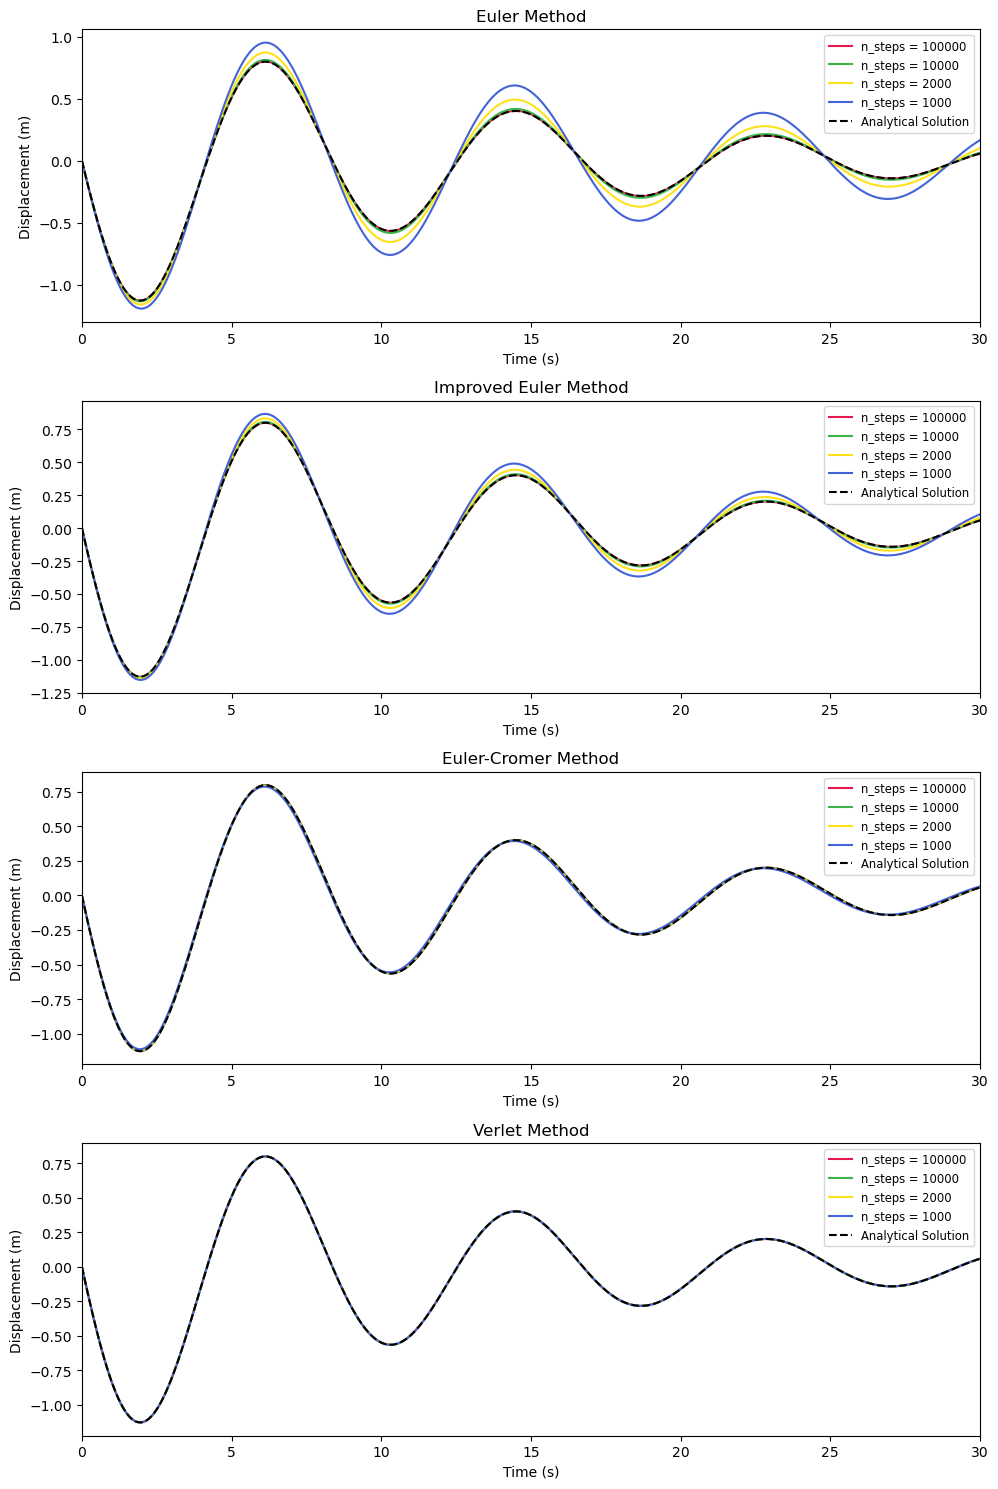

In [8]:
# Step sizes
h_step = [0.001, 0.01, 0.05, 0.1]

# Initialise plot
plt.figure()
plt.rcParams["figure.figsize"] = (10, 15)
fig, axs = plt.subplots(4)

# Define high-contrast colours
colours = ['#E6194B', '#3CB44B', '#FFE119', '#4363D8'] 

# Iterate over different step sizes
for idx, h in enumerate(h_step):
    # Compute number of steps
    n_step = int(T / h)
    time_range = np.arange(0, T, h)
    
    # Compute and plot Euler method
    x_euler_method, v_euler_method = euler_method(x_0, v_0, n_step, h, b)
    axs[0].plot(time_range, np.real(x_euler_method), label=f'n_steps = {n_step}', color=colours[idx])  # Update legend
    
    # Compute and plot Improved Euler method
    x_euler_improved_method, v__euler_improved_method = improved_euler_method(x_0, v_0, n_step, h, b)
    axs[1].plot(time_range, np.real(x_euler_improved_method), label=f'n_steps = {n_step}', color=colours[idx])  # Update legend
    
    # Compute and plot Euler-Cromer method
    x_euler_cromer_method, v_euler_cromer_method = euler_cromer_method(x_0, v_0, n_step, h, b)
    axs[2].plot(time_range, np.real(x_euler_cromer_method), label=f'n_steps = {n_step}', color=colours[idx])  # Update legend
    
    # Compute and plot Verlet method
    x_verlet_method = verlet_method(x_0, v_0, n_step, h, b)
    axs[3].plot(time_range, np.real(x_verlet_method), label=f'n_steps = {n_step}', color=colours[idx])  # Update legend

# Compute Analytical solution only once (for smallest step size)
time_range_analytical = np.arange(0, T, h_step[0])
x_analytical_method = analytical_method(x_0, v_0, time_range_analytical, b)

# Plot Analytical solution with dashed lines on each plot
for i in range(4):
    axs[i].plot(time_range_analytical, np.real(x_analytical_method), linestyle='--', label='Analytical Solution', color='black')

# Set plot titles and labels
titles = ['Euler Method', 'Improved Euler Method', 'Euler-Cromer Method', 'Verlet Method']
for i, title in enumerate(titles):
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Displacement (m)')
    axs[i].set_xlim(0, 30)
    axs[i].legend(loc='upper right', fontsize='small')

# Adjust layout
plt.subplots_adjust(right=1, top=1, wspace=0.8, hspace=0.5)
plt.tight_layout()

# Show plot
plt.show()

As we can see from the graphs above, the euler-cromer and verlet method are closer in values to the analytical solution. This is as they are sympletic, meaning they preserve the geometric structure of hamiltonian systems such as oscillatory or conservative systems. The euler and Improved euler method are non-sympletic meaning they introduce artifical energy, causing them to drift from the true analytical solution as time increase. This is clearly demonstrated in the graphs.

It is also obvious from the Euler and improved Euler graphs that a smaller time step, or a larger number of steps, produces a more accurate result and therefore we will use smaller values for the time steps throughout this analysis.

***
# Part 2 - Effect of Time Step and Damping
***

We are now going to see how varying damping values can affect the differing methods,

<Figure size 1000x1500 with 0 Axes>

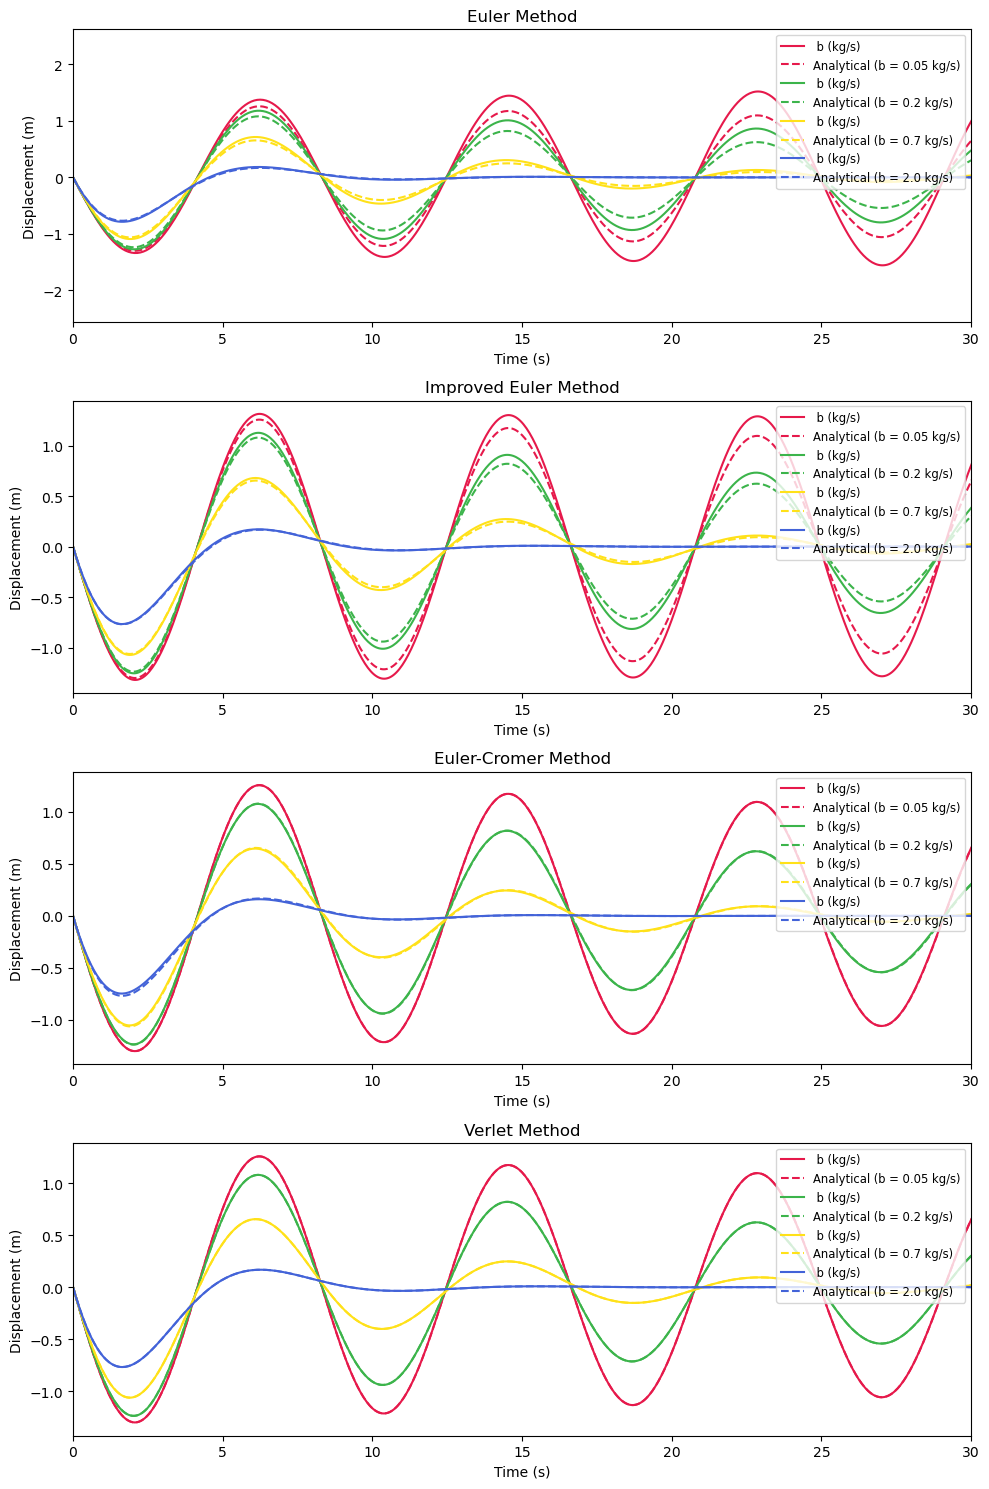

In [9]:
# Initialize plot
plt.figure()
plt.rcParams["figure.figsize"] = (10, 15)
fig, axs = plt.subplots(4)

# Define high-contrast colours
colours = ['#E6194B', '#3CB44B', '#FFE119', '#4363D8']

# Iterate over different damping coefficients
for idx, b in enumerate(b_values):
    # Set fixed step size and compute number of steps
    h_step = 0.05
    n_step = int(T / h_step)
    time_range = np.arange(0, T, h_step)

    # Compute and plot Euler method
    x_euler_method, v_euler_method = euler_method(x_0, v_0, n_step, h_step, b)
    axs[0].plot(time_range, np.real(x_euler_method), label=f' b (kg/s)', color=colours[idx])

    # Compute and plot Improved Euler method
    x_euler_improved_method, v_euler_improved_method = improved_euler_method(x_0, v_0, n_step, h_step, b)
    axs[1].plot(time_range, np.real(x_euler_improved_method), label=f' b (kg/s)', color=colours[idx])

    # Compute and plot Euler-Cromer method
    x_euler_cromer_method, v_euler_cromer_method = euler_cromer_method(x_0, v_0, n_step, h_step, b)
    axs[2].plot(time_range, np.real(x_euler_cromer_method), label=f' b (kg/s)', color=colours[idx])

    # Compute and plot Verlet method
    x_verlet_method = verlet_method(x_0, v_0, n_step, h_step, b)
    axs[3].plot(time_range, np.real(x_verlet_method), label=f' b (kg/s)', color=colours[idx])

    # Compute and plot Analytical solution for this b value
    x_analytical_method = analytical_method(x_0, v_0, time_range, b)

    # Plot Analytical solution with dashed lines, matching colour, and add to legend
    for i in range(4):
        axs[i].plot(time_range, np.real(x_analytical_method), linestyle='--', color=colours[idx], label=f'Analytical (b = {b} kg/s)')

# Set plot titles and labels
titles = ['Euler Method', 'Improved Euler Method', 'Euler-Cromer Method', 'Verlet Method']
for i, title in enumerate(titles):
    axs[i].set_title(title)
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Displacement (m)')
    axs[i].set_xlim(0, 30)
    axs[i].legend(loc='upper right', fontsize='small')  # Adjust legend position inside the graph

# Adjust layout
plt.subplots_adjust(right=1, top=1, wspace=0.3, hspace=0.5)
plt.tight_layout()
# Show plot
plt.show()

Again we can clearly see here how the Euler and improved-Euler methods vary greater and greater as time passes, we see here a small strayance in the inital 5 seconds of the damping value of 2.0kg for the Euler-Cromer method. This is expected as verlets method has a global error of O(h²) where as Eulers method has one of O(h).

 However we should investigate this more closely by looking at the energy of the system.  
 ## Energy
 The accuracy of numerical methods depends on the choice of the time step \( h \). To evaluate this, we compare errors in **energy conservation** for   different values of \( h \) and examine how each method behaves as \( h \) decreases.  
 

The **total energy**, $E$ of the system is given by:  

$$
E = T + U
$$

where:  
- **Kinetic Energy**:  
  $
  T = \frac{1}{2} m v^2
  $
- **Potential Energy**:  
  $
  U = \frac{1}{2} k x^2
  $

To assess the rigidity of each method, we compute the relative energy error over time, 

$$
\Delta E = \frac{|E_{n+1} - E_n|}{E_n}.
$$

A better numerical method would keep $ \Delta E  $ small, ensuring less drift over time.

## Root Mean Squared error  

To confirm our results, we can use the Root Mean squared (RMS) error to understand the overall accuracy of each method by comparing them to the analytical solution. The RMS error is given by:  

$$
\text{RMS Error} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} (x_n - x_{\text{true}, n})^2}
$$

where $N$ is the total number of time steps.  

A lower RMS error indicates that the method is close to the analytical solution. By analyzing both energy conservation and RMS error, we can determine which method is the most accurate.

In [10]:
def energy(x, v):
    '''
    Computes the total energy of the damped harmonic oscillator system.

    Parameters
    ----------
    x : numpy array
        Displacement of the system at each time step.
    v : numpy array
        Velocity of the system at each time step.

    Returns
    -------
    numpy array
        Total energy (kinetic + potential) of the system at each time step.
    '''
    E = 0.5 * m * v**2 + 0.5 * k * x**2
    return E

In [11]:
def compute_rms(energy_diff):
    '''
    Computes the root mean square (rms) of the energy difference.

    Parameters
    ----------
    energy_diff : numpy array
        Absolute energy difference at each time step.

    Returns
    -------
    float
        Root mean square of the energy difference.
    '''
    rms = np.sqrt(np.mean(energy_diff**2))
    return rms

In [12]:
def compute_energy_difference(method_func, x_0, v_0, n_step, h_step, b, time_range, E_analytical):
    """
    Computes the energy difference between a numerical method and the analytical solution.

    Parameters
    ----------
    method_func : function
        Numerical method function (e.g., euler_method, improved_euler_method, etc.).
    x_0 : float
        Initial displacement of the system.
    v_0 : float
        Initial velocity of the system.
    n_step : int
        Number of time steps for the integration.
    h_step : float
        Time step size.
    b : float
        Damping coefficient.
    time_range : numpy array
        Array of time values over the integration period.
    E_analytical : numpy array
        Analytical energy values at each time step.

    Returns
    -------
    numpy array
        Absolute energy difference between the numerical method and the analytical solution.
    """
    # Compute displacement and velocity using the specified numerical method
    if method_func == verlet_method:
        x_method = method_func(x_0, v_0, n_step, h_step, b)  # Verlet method only returns displacement
        v_method = np.gradient(x_method, time_range)  # Compute velocity using gradient
    else:
        x_method, v_method = method_func(x_0, v_0, n_step, h_step, b)  # Other methods return both x and v

    # Compute energy for the numerical method
    E_method = energy(x_method, v_method)

    # Compute absolute energy difference
    energy_difference = np.abs(E_method - E_analytical)

    return energy_difference

<Figure size 1000x1500 with 0 Axes>

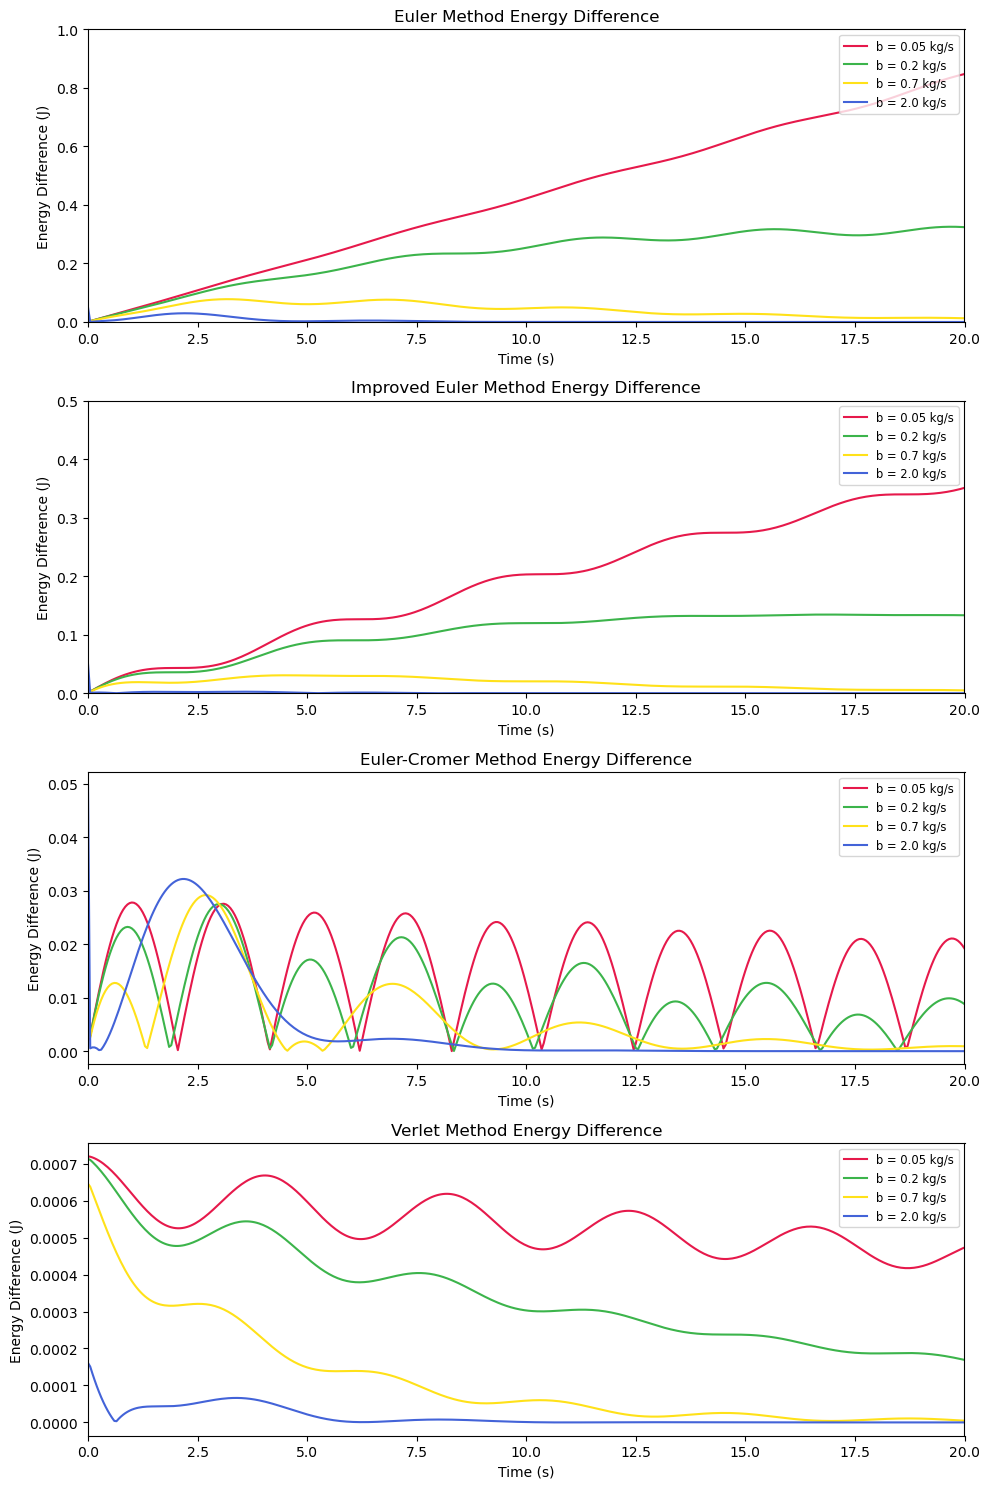

Root Mean Square  (rms) of Energy Differences:

Euler Method:
  b = 0.05 kg/s: 2.570560
  b = 0.2 kg/s: 0.190960
  b = 0.7 kg/s: 0.021352
  b = 2.0 kg/s: 0.004141

Improved Euler Method:
  b = 0.05 kg/s: 0.668689
  b = 0.2 kg/s: 0.075494
  b = 0.7 kg/s: 0.008746
  b = 2.0 kg/s: 0.001202

Euler-Cromer Method:
  b = 0.05 kg/s: 0.010938
  b = 0.2 kg/s: 0.005727
  b = 0.7 kg/s: 0.004065
  b = 2.0 kg/s: 0.004642

Verlet Method:
  b = 0.05 kg/s: 0.000341
  b = 0.2 kg/s: 0.000172
  b = 0.7 kg/s: 0.000081
  b = 2.0 kg/s: 0.000013


In [13]:
# Initialize plot
plt.figure(figsize=(10, 15))
fig, axs = plt.subplots(4)

# Define high-contrast colours
colours = ['#E6194B', '#3CB44B', '#FFE119', '#4363D8']

# Define the methods to be used
methods = [euler_method, improved_euler_method, euler_cromer_method, verlet_method]
method_names = ['Euler Method', 'Improved Euler Method', 'Euler-Cromer Method', 'Verlet Method']

# Dictionary to store rms values for each method and damping coefficient
rms_values = {method_name: [] for method_name in method_names}

# Iterate over different damping coefficients
for idx, b in enumerate(b_values):
    # Set fixed step size and compute number of steps
    h = 0.05
    n_step = int(T / h)
    time_range = np.arange(0, T, h)

    # Compute the analytical solution
    x_analytical_method = analytical_method(x_0, v_0, time_range, b)
    v_analytical_method = np.gradient(x_analytical_method, time_range)
    E_analytical = energy(x_analytical_method, v_analytical_method)

    # Compute and plot energy difference for each method
    for i, method in enumerate(methods):
        energy_diff = compute_energy_difference(method, x_0, v_0, n_step, h, b, time_range, E_analytical)
        axs[i].plot(time_range, energy_diff, label=f'b = {b} kg/s', color=colours[idx])

        # Calculate rms for the energy difference (store for later, do not plot)
        rms = compute_rms(energy_diff)
        rms_values[method_names[i]].append(rms)  # Store rms for this method and damping coefficient

# Set plot titles and labels
for i, title in enumerate(method_names):
    axs[i].set_title(f'{title} Energy Difference')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Energy Difference (J)')
    axs[i].set_xlim(0, 20)
    axs[i].legend(loc='upper right', fontsize='small')  # Adjust legend position inside the graph

    # Adjust y-axis limits for Euler and Improved Euler methods
    if i == 0:  # Euler Method
        axs[i].set_ylim(0, 1)  # Adjust y-axis limit for better fit
    elif i == 1:  # Improved Euler Method
        axs[i].set_ylim(0, 0.5)  # Adjust y-axis limit for better fit

# Adjust layout
plt.subplots_adjust(right=1, top=1, wspace=0.3, hspace=0.5)
plt.tight_layout()

# Show plot
plt.show()

# Print rms values for each method and damping coefficient (after plotting)
print("Root Mean Square  (rms) of Energy Differences:")
for method_name, rms_list in rms_values.items():
    print(f"\n{method_name}:")
    for b, rms in zip(b_values, rms_list):
        print(f"  b = {b} kg/s: {rms:.6f}")

As shown by our RMS results, the Verlet method proves to be the most accurate solution when being compared to the analytical solution. We can see above that the Verlet method has the smallest RMS differences in comparison to the other methods. For all damping coefficients the Verlet method was significantly less than the other methods, by around a factor of 10². This is due to its ability to conserve energy. Thus, this method is extremely useful in physics, commonly used when simulating conservative systems such as planetary motion, molecular dynamics, and oscillatory motion. Therefore, we will only be using the Verlet method for the rest of this analysis.

## Damping  

The motion of a harmonic oscillator is influenced by *damping*, which is a resistive force that reduces its amplitude over a period of time. A damping force is proportional to the velocity and is given by:  

$$
F_{\text{damp}} = -b v
$$  

where *b* is the damping coefficient. 

The governing equation of motion then becomes:  

$$
m \frac{d^2x}{dt^2} + b \frac{dx}{dt} + kx = 0.
$$  

The behavior of the system depends on the value of b:  

- **Underdamped b < b_cr**:  system oscillates with gradually decreasing amplitude, it returns to equilibrium too fast and crosses the equilibrium position
- **Critically damped b = b_cr**: The system returns to equilibrium as quickly as possible without oscillating.  
- **Overdamped b > b_cr**: The system returns to equilibrium slowly, with no oscillations, are less responsive to disturbances and can lead to slower stabilization 

To demonstrate the role of damping, we will plot the displacement of the system under the three damping conditions.


In [14]:
# Define damping coefficients based on critical damping
def compute_damping_coefficients(m, k):
    """
    Computes underdamped, critically damped, and overdamped coefficients.

    Parameters
    ----------
    m : float
        Mass of the system.
    k : float
        Spring constant.

    Returns
    -------
    tuple
        A tuple containing:
        - underdamped: Damping coefficient for underdamped case.
        - critical: Damping coefficient for critically damped case.
        - overdamped: Damping coefficient for overdamped case.
    """
    b_cr = np.sqrt(4 * m * k)  # Critical damping coefficient
    underdamped = 0.5 * b_cr  # Underdamped coefficient
    critical = b_cr  # Critically damped coefficient
    overdamped = 2 * b_cr  # Overdamped coefficient

    return underdamped, critical, overdamped

In [15]:
# Define a function to compute results for different damping cases
def compute_damping_results(x_0, v_0, m, k, h_step, T):
    """
    Computes the displacement for underdamped, critically damped, and overdamped cases using the Verlet method.

    Parameters
    ----------
    x_0 : float
        Initial displacement of the system.
    v_0 : float
        Initial velocity of the system.
    m : float
        Mass of the system.
    k : float
        Spring constant.
    h_step : float
        Time step.
    T : float
        Total time.

    Returns
    -------
    tuple
        A tuple containing:
        - time_range: Array of time values.
        - x_results: List of displacement results for each damping case.
        - b_values: List of damping coefficients for each damping case.
    """
    # Time parameters
    n_step = int(T / h_step)  # Number of steps
    time_range = np.arange(0, T, h_step)  # Time array

    # Compute damping coefficients
    underdamped, critical, overdamped = compute_damping_coefficients(m, k)

    # Solve for different damping cases
    x_results = [
        verlet_method(x_0, v_0, n_step, h_step, underdamped),  # Underdamped
        verlet_method(x_0, v_0, n_step, h_step, critical),      # Critically damped
        verlet_method(x_0, v_0, n_step, h_step, overdamped)     # Overdamped
    ]

    # Store damping coefficients in a list
    b_values = [underdamped, critical, overdamped]

    return time_range, x_results, b_values

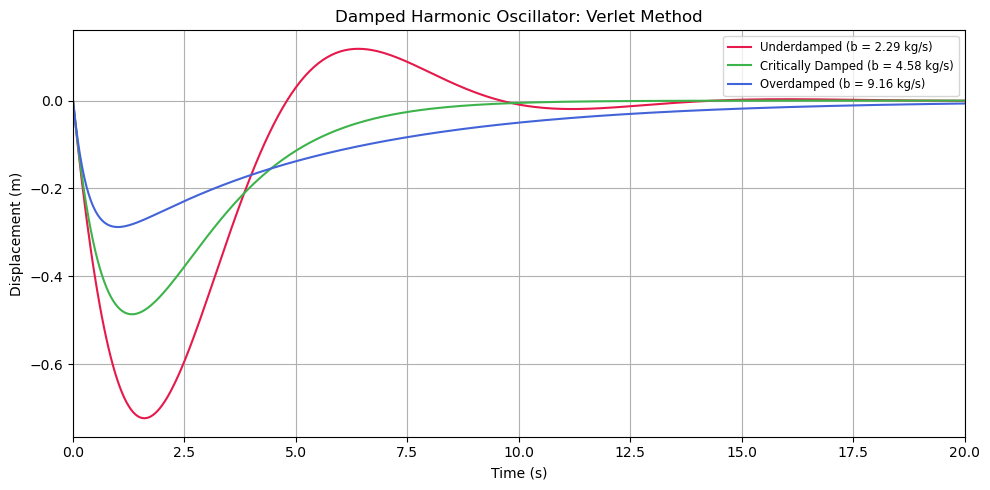

In [16]:
# Call the function to compute results
time_range, x_results, b_values = compute_damping_results(x_0, v_0, m, k, h_step, T)

# Initialize plot
plt.figure(figsize=(10, 5))

# Define colours for different damping types
colours = ['#E6194B', '#3CB44B', '#4363d8']

# Plot results
damping_types = ['Underdamped', 'Critically Damped', 'Overdamped']
for i, (damping_type, x) in enumerate(zip(damping_types, x_results)):
    plt.plot(time_range, x, label=f'{damping_type} (b = {b_values[i]:.2f} kg/s)', color=colours[i])

# Set plot titles and labels
plt.title('Damped Harmonic Oscillator: Verlet Method')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.xlim(0, 20)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

The graph displays the displacement of a damped harmonic oscillator over time using the Verlet method for three different damping values:

$$ Underdamped, (Red, 𝑏 = 2.29 kg/s). $$ 
The system oscillates multiple times before settling at equilibrium, with its oscillation decaying over time.

$$ Critically Damped (Green, b=4.58 kg/s) $$
The system returns to equilibrium as quickly as possible without oscillating. No overshooting occurs.

$$ Overdamped (Blue, b = 9.16 kg/s)$$ 
The system takes longer to return to equilibrium, with no oscillation.

***
# Part 3 - Forced Oscillations and Resonance
***

## Forced Oscillations  

In addition to damping, a harmonic oscillator can also be subjected to an *external driving force*, which is called a forced oscillator. The equation of motion for this oscillator becomes:  

$$
m \frac{d^2x}{dt^2} + b \frac{dx}{dt} + kx = F(t).
$$  

Here, $F(t)$ is the external force, which is often periodic, reperesented as a sin or cos wave, such as:  

$$
F(t) = F_0 \cos(\omega t),
$$  

where:  
- $F_0$  is the amplitude of the external force,  
- $\omega$ is the driving frequency.  

## Instantaneous Forced Oscillations  

In some cases, an external force is applied suddenly to the system rather than continuously. This creates an instantaneous forced oscillation, where the system's response depends on the timing and direction of the applied force. The equation of motion remains:  

$$
m \frac{d^2x}{dt^2} + b \frac{dx}{dt} + kx = F(t),
$$  

but here, F(t) is an extremely short amount of time rather than a continuous driving force.  

The system’s response depends on:  

- **Magnitude of the force  *F_0***: A larger force results in a greater displacement.  
- **Timing of application**: Applying the force at different points in the oscillation cycle affects how the system responds.  
- **Direction relative to velocity**:  
  - If the force is **in the same direction as velocity**, it increases the amplitude of oscillations.  
  - If the force is **opposite to velocity**, it reduces the amplitude and can even dampen motion.  

In [17]:
def step_calc(t_break, h_step):
    """
    Calculate the number of steps before and after a specific time.

    Parameters:
    -----------
    t_break : float
        The time at which the force is applied (in seconds).
    h_step : float
        The time step size (in seconds).

    Returns:
    --------
    n_step_prev : int
        The number of steps before the force is applied.
    n_step_after : int
        The number of steps after the force is applied.
    """
    n_step_prev = int(t_break / h_step)  # Steps before the force is applied
    n_step_after = int((T - t_break) / h_step)  # Steps after the force is applied
    return n_step_prev, n_step_after

In [18]:
def verlet_method_forced(x_0, v_0, n_step, h_step, b, t_init, F_0, w_0):
    """
    Verlet method for forced damped harmonic oscillator.

    Parameters:
    -----------
    x_0 : float
        Initial displacement of the system (in meters).
    v_0 : float
        Initial velocity of the system (in meters/second).
    n_step : int
        Number of time steps for the integration.
    h_step : float
        Time step size (in seconds).
    b : float
        Damping coefficient (in kg/s).
    t_init : float
        Initial time when the driving force starts acting (in seconds).
    F_0 : float
        Amplitude of the driving force (in Newtons).
    w_0 : float
        Frequency of the driving force (in radians/second).

    Returns:
    --------
    x : numpy array
        Array of displacements at each time step (in meters).
    """
    x = np.zeros(n_step)  # Initialize displacement array
    x[0] = x_0  # Set initial displacement

    # Calculate initial acceleration (including damping, spring force, and external force)
    a0 = (-b / m) * v_0 - (k / m) * x_0 + (F_0 / m) * np.cos(w_0 * t_init)

    # Calculate the second displacement using the improved Euler method
    x[1] = x[0] + h_step * v_0 + (h_step**2 / 2) * a0

    # Define a constant for the Verlet iteration
    D = 2 * m + b * h_step

    # Verlet iteration for subsequent steps
    for i in range(1, n_step - 1):
        t = h_step * i + t_init  # Current time
        # Update displacement using the Verlet method (including external force)
        x[i + 1] = (
            (2 * (2 * m - k * h_step**2) / D) * x[i] +
            ((b * h_step - 2 * m) / D) * x[i - 1] +
            (2 * h_step**2 * F_0 * np.cos(w_0 * t)) / D
        )
    return x

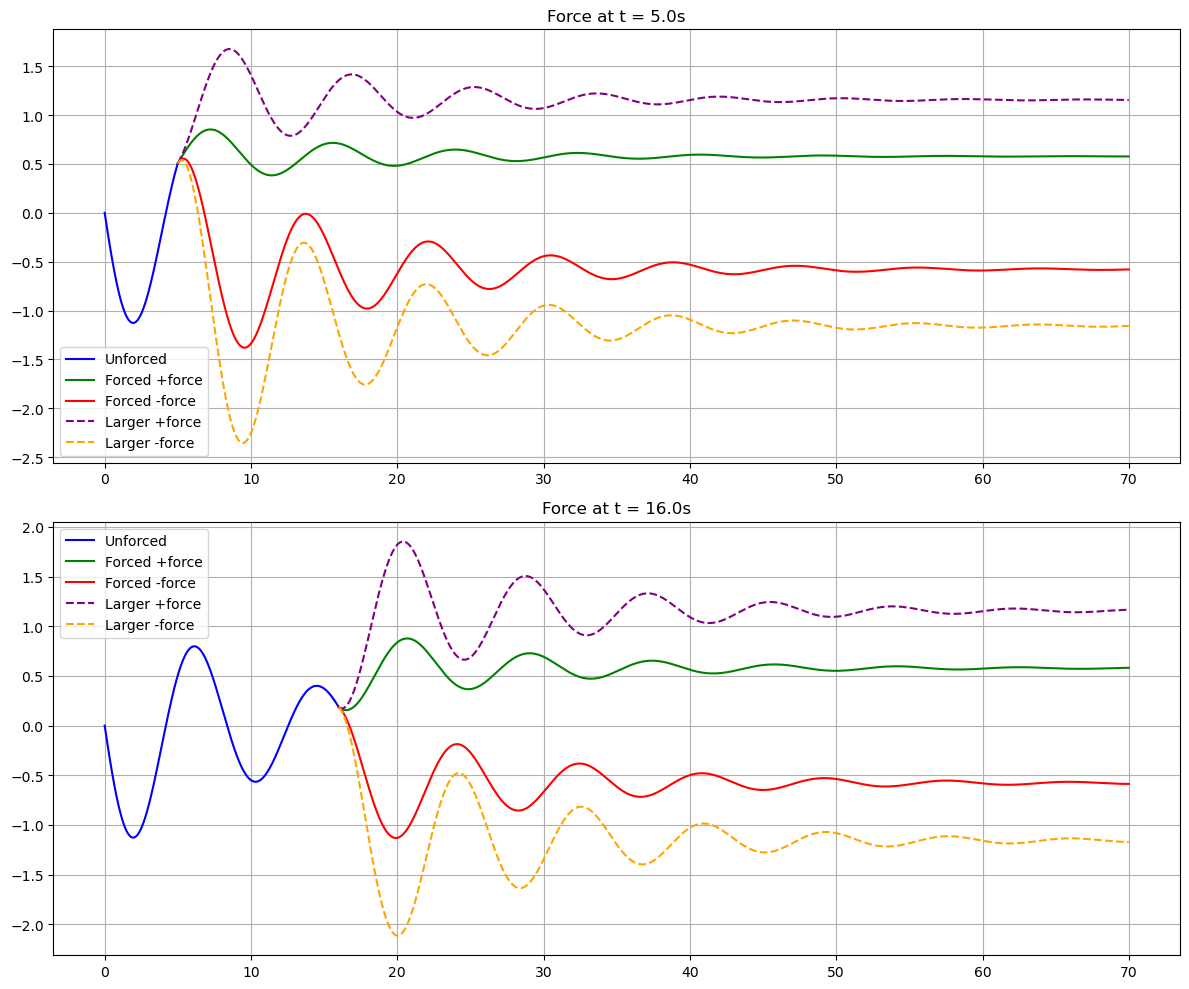

In [19]:
# Constants
T = 70  # Total simulation time (s)
b = 0.5  # Damping coefficient
# Time step
t = 0.001  

# Force application times
t_force_1 = 5.0  
t_force_2 = 16.0  
F_0 = 1.0  
F = 2.0 * F_0  

# Sinusoidal force properties
omega_natural = np.sqrt(k / m)  # Natural frequency
omega_external = 1.7 * omega_natural  # Sinusoidal forcing different from natural frequency

# Compute step counts
n_step_before_1, n_step_after_1 = step_calc(t_force_1, t)
n_step_before_2, n_step_after_2 = step_calc(t_force_2, t)

# Compute unforced oscillations before force applications
x_unforced_1 = verlet_method(x_0, v_0, n_step_before_1, t, b)
x_unforced_2 = verlet_method(x_0, v_0, n_step_before_2, t, b)

# Compute initial velocity at force application times
v_change_1 = (x_unforced_1[-1] - x_unforced_1[-2]) / (2 * t)
v_change_2 = (x_unforced_2[-1] - x_unforced_2[-2]) / (2 * t)

# Compute forced oscillations for different scenarios
x_forced_1 = verlet_method_forced(x_unforced_1[-1], v_change_1, n_step_after_1, t, b, t_force_1, F_0, 0)
x_forced_neg_1 = verlet_method_forced(x_unforced_1[-1], v_change_1, n_step_after_1, t, b, t_force_1, -F_0, 0)
x_forced_larger_1 = verlet_method_forced(x_unforced_1[-1], v_change_1, n_step_after_1, t, b, t_force_1, F, 0)
x_forced_larger_neg_1 = verlet_method_forced(x_unforced_1[-1], v_change_1, n_step_after_1, t, b, t_force_1, -F, 0)

x_forced_2 = verlet_method_forced(x_unforced_2[-1], v_change_2, n_step_after_2, t, b, t_force_2, F_0, 0)
x_forced_neg_2 = verlet_method_forced(x_unforced_2[-1], v_change_2, n_step_after_2, t, b, t_force_2, -F_0, 0)
x_forced_larger_2 = verlet_method_forced(x_unforced_2[-1], v_change_2, n_step_after_2, t, b, t_force_2, F, 0)
x_forced_larger_neg_2 = verlet_method_forced(x_unforced_2[-1], v_change_2, n_step_after_2, t, b, t_force_2, -F, 0)

# Compute sinusoidal forced oscillations
n_steps = int(T / t)
x_forced_sinusoidal = verlet_method_forced(x_0, v_0, n_steps, t, b, 0, F_0, omega_external)

# Define time arrays
time = np.arange(0, T, t)

# plots sudden Force Applications
fig, axs = plt.subplots(2, figsize=(12, 10))

# First force application
axs[0].plot(time[:n_step_before_1], x_unforced_1, label='Unforced', color='blue')
axs[0].plot(time[n_step_before_1:], x_forced_1, label='Forced +force', color='green')
axs[0].plot(time[n_step_before_1:], x_forced_neg_1, label='Forced -force', color='red')
axs[0].plot(time[n_step_before_1:], x_forced_larger_1, '--', label='Larger +force', color='purple')
axs[0].plot(time[n_step_before_1:], x_forced_larger_neg_1, '--', label='Larger -force', color='orange')
axs[0].set_title(f'Force at t = {t_force_1}s')
axs[0].legend()
axs[0].grid()

# Second force application
axs[1].plot(time[:n_step_before_2], x_unforced_2, label='Unforced', color='blue')
axs[1].plot(time[n_step_before_2:], x_forced_2, label='Forced +force', color='green')
axs[1].plot(time[n_step_before_2:], x_forced_neg_2, label='Forced -force', color='red')
axs[1].plot(time[n_step_before_2:], x_forced_larger_2, '--', label='Larger +force', color='purple')
axs[1].plot(time[n_step_before_2:], x_forced_larger_neg_2, '--', label='Larger -force', color='orange')
axs[1].set_title(f'Force at t = {t_force_2}s')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

A force in the direction of oscillation increases amplitude more than an opposing force, shifting the system to a new equilibrium. Oscillations gradually fade, settling at this position, which depends on the force’s direction and magnitude, while timing affects only amplitude.

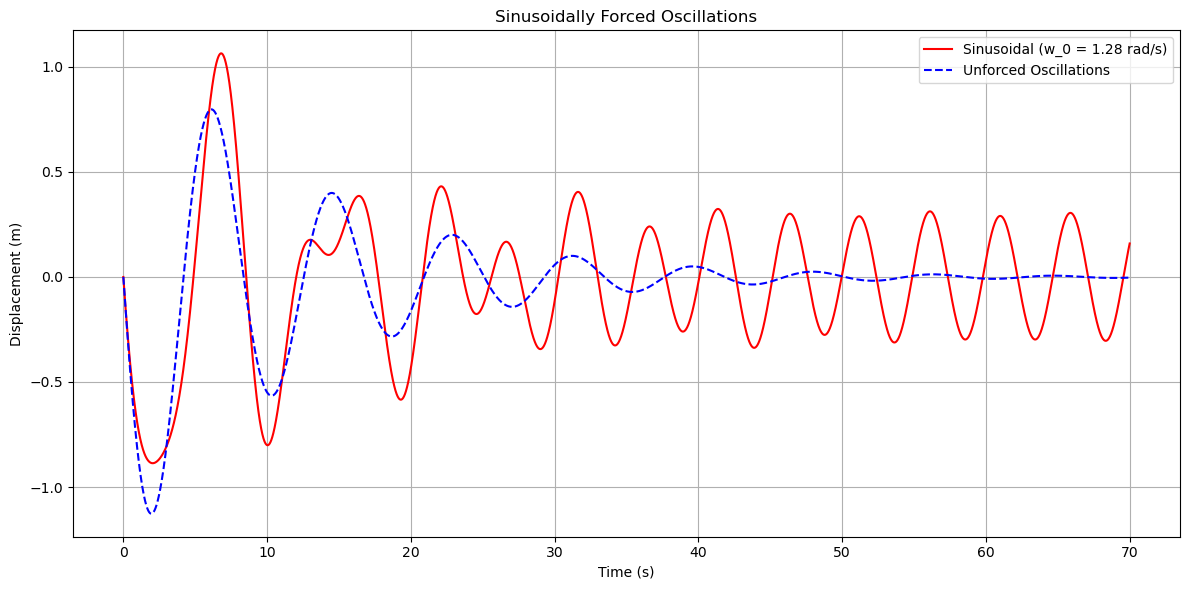

In [20]:
#  plots Sinusoidal Forced Oscillations
plt.figure(figsize=(12, 6))
plt.plot(time, x_forced_sinusoidal, label=f'Sinusoidal (w_0 = {omega_external:.2f} rad/s)', color='red')
plt.plot(time, verlet_method(x_0, v_0, len(time), t, b), '--', label='Unforced Oscillations', color='blue')
plt.title(f"Sinusoidally Forced Oscillations")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

When a sinusoidal external force is applied to a damped harmonic oscillator, it interacts with the system’s natural motion, this initally causes irregular behavior at the start as seen in the graph above. Over time as the damped harmonic oscillator loses its natural energy, it reaches a steady state where the oscillation is fully driven by the external source as shown by the sinusoidal waves becoming uniform.

In [24]:
def verlet_method_forced_amplitude(x0, v0, nstep, t_step, b, F_0, w_d, k, m):
    """
    Verlet method for forced damped harmonic oscillator, returns the max amplitude.
    """  """
    Verlet method for forced damped harmonic oscillator, returns the max amplitude.

    Parameters:
    -----------
    x0 : float
        Initial displacement of the system (in meters).
    v0 : float
        Initial velocity of the system (in meters per second).
    nstep : int
        Number of time steps for the simulation.
    t_step : float
        Time step size (in seconds).
    b : float
        Damping coefficient (in kg/s).
    F_0 : float
        Amplitude of the external driving force (in Newtons).
    w_d : float
        Driving frequency of the external force (in radians per second).
    k : float
        Spring constant (in N/m).
    m : float
        Mass of the oscillator (in kg).

    Returns:
    --------
    Amp : float
        Maximum amplitude of steady-state oscillations.
    """
    x = np.zeros(nstep)
    x[0] = x0
    a0 = (-b / m) * v0 - (k / m) * x0 + (F_0 / m) * np.cos(w_d * 0)
    x[1] = x[0] + t_step * v0 + (t_step**2 / 2) * a0
    
    for i in range(1, nstep - 1):
        t = t_step * i
        x[i + 1] = (2 * x[i] - x[i - 1] + (t_step**2 / m) * 
                    (-b * (x[i] - x[i - 1]) / t_step - k * x[i] + F_0 * np.cos(w_d * t)))

    # Move Amp calculation out of the loop
    Amp = np.max(np.abs(x[int(nstep/2):]))  # Measure steady-state amplitude
    return Amp


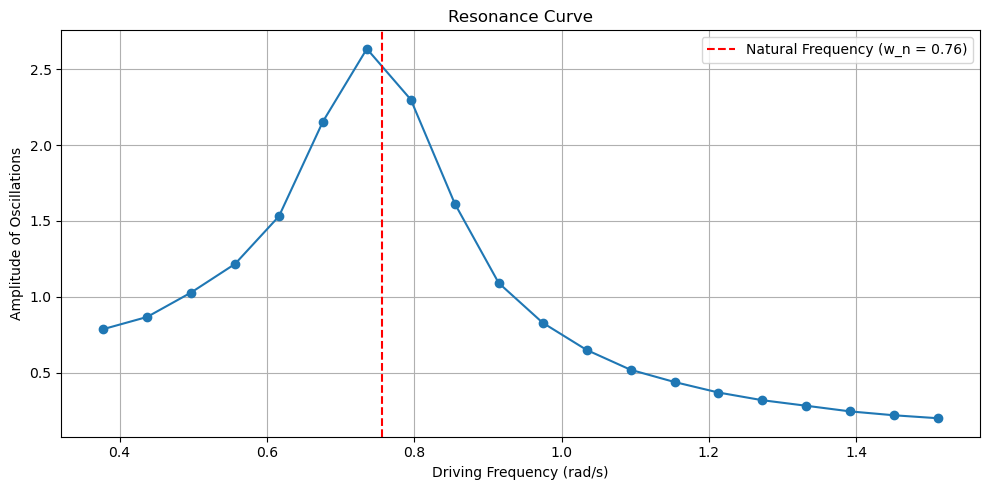

In [27]:
#constants
w_n = np.sqrt(k / m)  # Natural frequency

# Frequency range for investigation
w_values = np.linspace(0.5 * w_n, 2 * w_n, 20)
amplitudes = []

for w_d in w_values:
    amp = verlet_method_forced_amplitude(0, 0, n_steps, t, b, F_0, w_d, k, m)
    amplitudes.append(amp)

# Plot resonance curve
plt.figure(figsize=(10, 5))
plt.plot(w_values, amplitudes, marker='o', linestyle='-')
plt.axvline(w_n, color='r', linestyle='--', label=f'Natural Frequency (w_n = {w_n:.2f})')
plt.title('Resonance Curve')
plt.xlabel('Driving Frequency (rad/s)')
plt.ylabel('Amplitude of Oscillations')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()